In [1]:
import yfinance as yf

# Download historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]  # Focus on closing prices
data.dropna(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


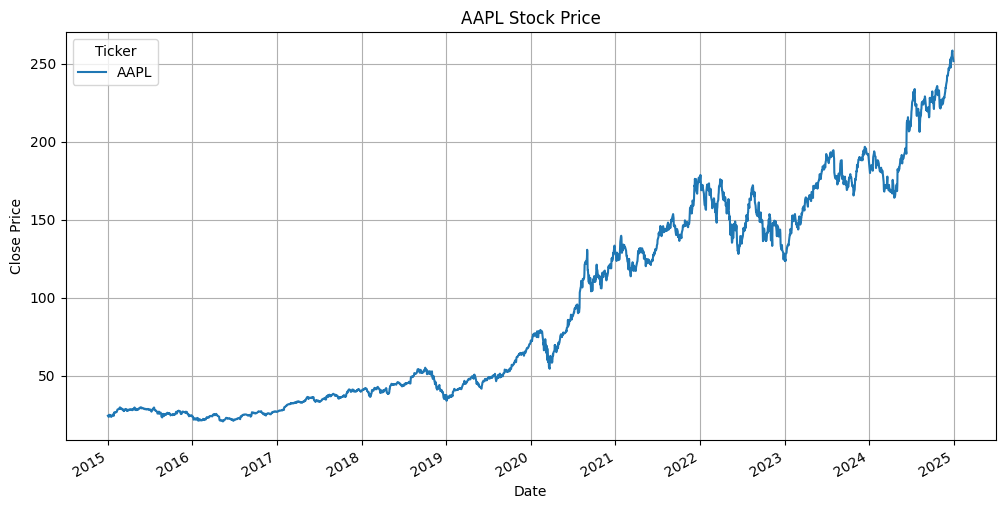

In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(12, 6))
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

2515    251.753476
2516    251.978166
2517    252.021391
2518    251.910853
2519    251.851751
2520    251.859831
2521    251.868156
2522    251.868547
2523    251.865540
2524    251.864493
2525    251.864815
2526    251.865053
2527    251.865034
2528    251.864957
2529    251.864940
2530    251.864951
2531    251.864957
2532    251.864955
2533    251.864953
2534    251.864953
2535    251.864953
2536    251.864954
2537    251.864954
2538    251.864954
2539    251.864954
2540    251.864954
2541    251.864954
2542    251.864954
2543    251.864954
2544    251.864954
Name: predicted_mean, dtype: float64


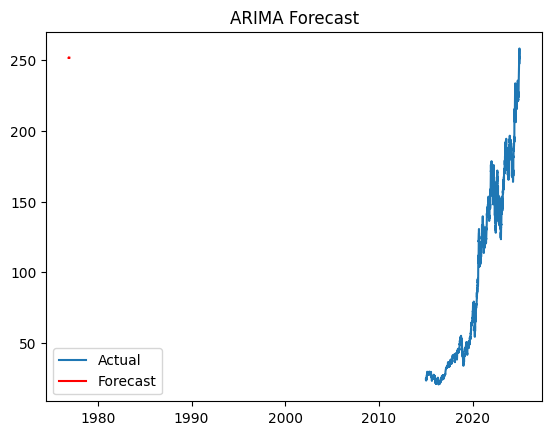

In [32]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(5,1,0))  # p, d, q
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
print(forecast)
rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast)) # Calculate RMSE for the last 30 data points
#plot
plt.plot(data['Close'], label='Actual') # Plot the 'Close' column for the actual data
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

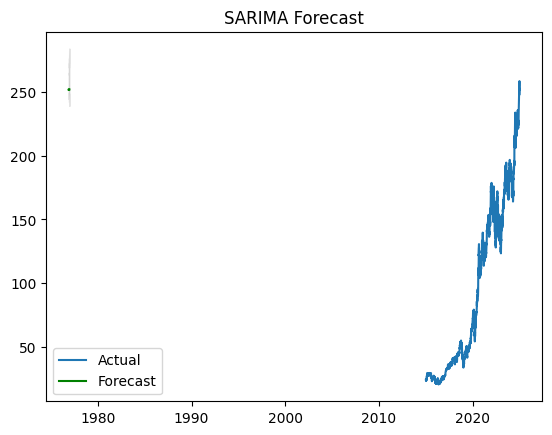

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
# Fit SARIMA model (adjust parameters)
# Instead of passing the entire DataFrame, select the 'Close' column
model = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
result = model.fit()

# Forecast
forecast_object = result.get_forecast(steps=30)
forecast_sarima = forecast_object.predicted_mean
forecast_ci = forecast_object.conf_int()

# Calculate RMSE for SARIMA
rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima)) # type: ignore # Calculate RMSE for the last 30 data points


# Plot
plt.plot(data['Close'], label='Actual')  # Actual data
forecast.plot(label='Forecast', color='green')  # Forecast line
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)  # Confidence interval
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# 📏 SARIMA Forecasting
model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(30)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqt_xps7w/oe6p9_rp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqt_xps7w/0djnyk3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91399', 'data', 'file=/tmp/tmpqt_xps7w/oe6p9_rp.json', 'init=/tmp/tmpqt_xps7w/0djnyk3e.json', 'output', 'file=/tmp/tmpqt_xps7w/prophet_modelpew5ndyw/prophet_model-20250521071531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


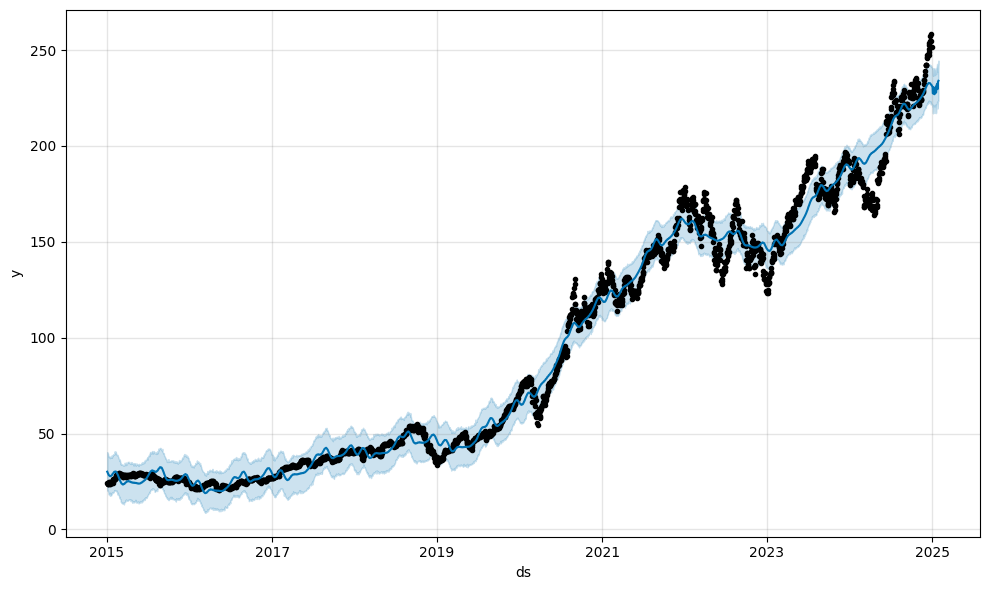

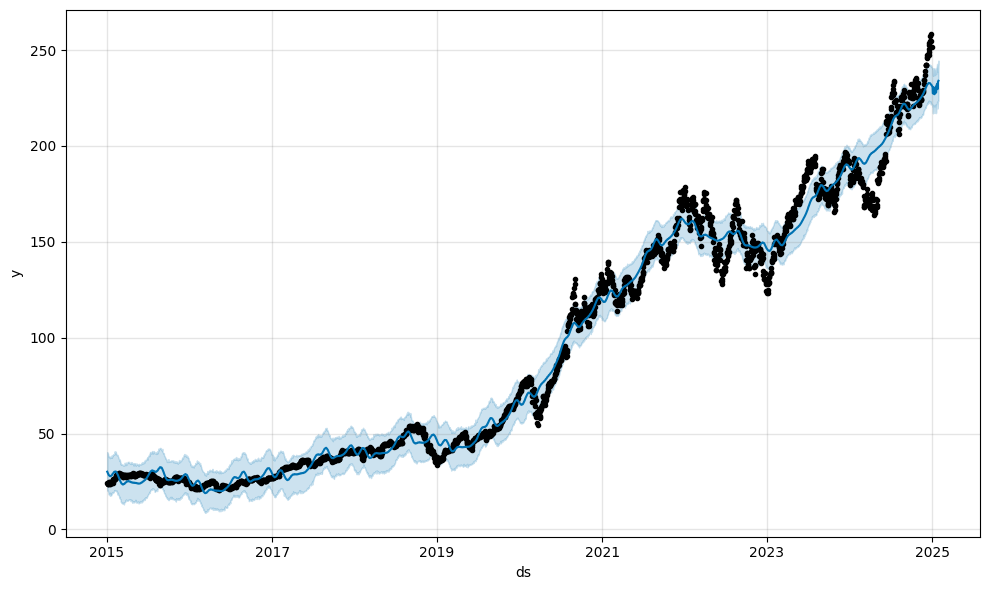

In [34]:
from prophet import Prophet

df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast_ph= model.predict(future)
# Calculate RMSE for Prophet
rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_ph['yhat'][-30:]))  # Calculate RMSE for the last 30 data points
import matplotlib.pyplot as plt

model.plot(forecast_ph)

In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example dummy data (e.g., stock prices)
data = np.array([i for i in range(100)]).reshape(-1, 1)

# Scale the data to range [0, 1]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Function to create sequences of data
def create_dataset(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create sequences
X, y = create_dataset(scaled)

# Reshape X for LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Output shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example dummy data (e.g., stock prices)
data = np.array([i for i in range(100)]).reshape(-1, 1)




X shape: (40, 60, 1)
y shape: (40,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

# Split into train/test
train_size = int(len(scaled) * 0.8)
train, test = scaled[:train_size], scaled[train_size:]

# Create sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)


# Train
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

# Plot
plt.plot(data.index, data['Close'], label='Actual') # Changed data.values to data['Close']
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(data.index[len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0510
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0021
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0021
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0018
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0015
Epoch 6/20
18/77 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0020

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0491
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 4.2028e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3.4267e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 3.7426e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.6226e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 3.5230e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 3.0965e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 2.9484e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 2.8037e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.7376e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
LSTM RMSE: 5.528711786456104


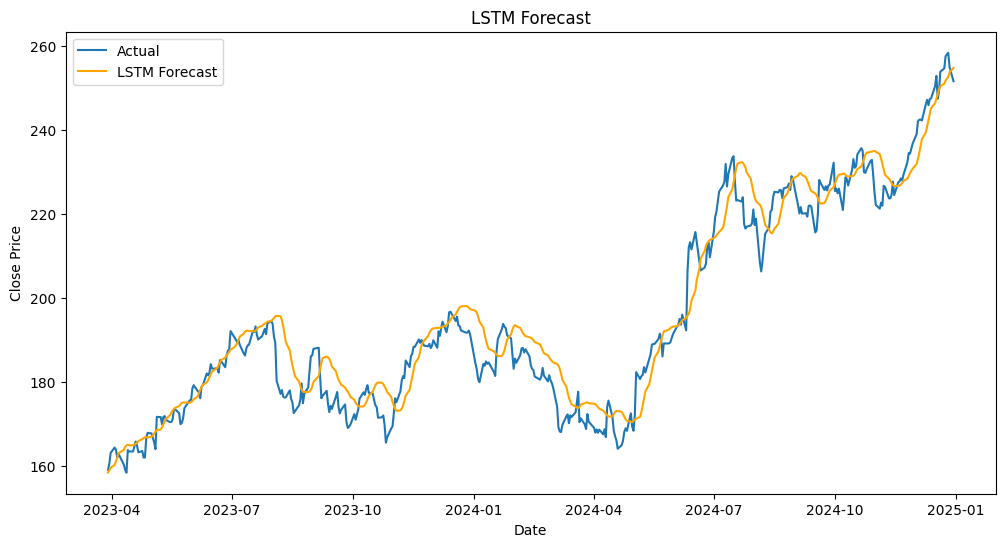

In [55]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported
import yfinance as yf # Make sure yfinance is imported
from sklearn.metrics import mean_squared_error # Make sure mean_squared_error is imported


# 📏 LSTM Forecasting
scaler = MinMaxScaler(feature_range=(0,1))

# Use the original data DataFrame instead of the dummy numpy array
# Check if data is a DataFrame and has 'Close' column, otherwise reload
# Ensure data is loaded if it's not available or is the dummy data from earlier cells
if not isinstance(data, pd.DataFrame) or 'Close' not in getattr(data, 'columns', []):
    print("Reloading data...")
    ticker = 'AAPL'
    data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
    data = data[['Close']]
    data.dropna(inplace=True)


data_scaled = scaler.fit_transform(data[['Close']])

# Function to create sequences of data (defined again for clarity in this cell)
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)


# Create training sequences
# This block might be redundant if trained model is already loaded or created in a previous cell.
# Assuming you want to retrain or define the model in this cell:
X_train_lstm_init, y_train_lstm_init = create_dataset(data_scaled, 60) # Using entire scaled data for initial model training

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm_init.shape[1], 1))) # Use shape from initial training data
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_lstm_init, y_train_lstm_init, epochs=10, batch_size=32)


# Split into train/test based on time step
train_size = int(len(data_scaled) * 0.8)
# Correctly split the data for creating sequences for prediction
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:1]


# Create sequences for the test set inputs and outputs
# **FIX:** Correctly get X_test (inputs) and y_test (actuals)
X_test_seq, y_test_actual = create_dataset(test_data, time_step)

# Reshape X_test_seq for LSTM input (samples, time_steps, features)
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], time_step, 1)


# Make predictions for LSTM
# Use the correctly prepared X_test_seq for prediction
lstm_predictions = model_lstm.predict(X_test_seq)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Inverse transform the actual test values for RMSE calculation
y_test_actual = scaler.inverse_transform(y_test_actual.reshape(-1, 1))

# Calculate RMSE for LSTM
# Ensure the length of actual data matches the prediction length for RMSE calculation
# Use the inverse transformed actual test values
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
print(f"LSTM RMSE: {rmse_lstm}")


# Plotting the LSTM results
# Determine the index for plotting the test predictions
# The predictions correspond to y_test_actual, which starts after the training data and time_step window in the test set
test_predict_start_index = train_size + time_step + 1 # Index in original data corresponding to the first prediction

plt.figure(figsize=(12, 6))
# Plot actual test data
plt.plot(data.index[test_predict_start_index:test_predict_start_index + len(y_test_actual)],
         data['Close'][test_predict_start_index:test_predict_start_index + len(y_test_actual)],
         label='Actual')
# Plot LSTM predictions
plt.plot(data.index[test_predict_start_index:test_predict_start_index + len(lstm_predictions)],
         lstm_predictions, label='LSTM Forecast', color='orange')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [59]:
!pip install streamlit
import streamlit  as st
# 📊 Streamlit Dashboard
st.title("Stock Market Forecast Dashboard")
st.line_chart(data['Close'])
st.subheader("ARIMA Forecast")
st.line_chart(forecast)
st.subheader("SARIMA Forecast")
st.line_chart(forecast_sarima)
st.subheader("Prophet Forecast")
st.line_chart(forecast_ph[['ds', 'yhat']].set_index('ds').tail(30))

st.subheader("Model Accuracy (RMSE)")
st.write(f'ARIMA RMSE: {rmse_arima:.2f}')
st.write(f'SARIMA RMSE: {rmse_sarima:.2f}')
st.write(f'Prophet RMSE: {rmse_prophet:.2f}')
st.write(f'LSTM RMSE: {rmse_lstm:.2f}')

st.success("All forecasts generated successfully")


2025-05-21 08:00:05.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 08:00:05.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()